### Sampling and the central limit theorem

#### Assignments

Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. 

Using your own Jupyter notebook, or a copy of the notebook above, reproduce the pop1 and pop2 populations and samples using numpy's binomial function. 

Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. 

The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. 

Using a sample size of 100, calculate the means and standard deviations of your samples.

For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.

Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. 

Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

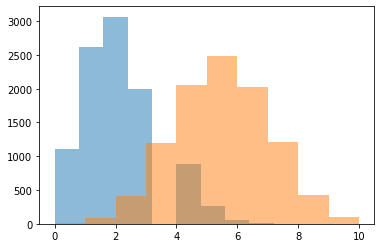

Sample mean 1: 2.1 
Sample mean 2: 4.93 
Standard Deviation 1: 1.337115846843043 
Standard Deviation 2: 1.6952399192557919 


In [12]:
# create two binomially distributed populations with n equal to 10 and size equal to 10000.
# The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. 

# for population 2, the p value is large - what does that mean?

pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

plt.hist(pop1, alpha=0.5, label='Population 1') # I forgot what Alpha was for?
plt.hist(pop2, alpha=0.5, label='Population 2')
plt.show()

# Using a sample size of 100, calculate the means and standard deviations of your samples.
sample1 = np.random.choice(pop1, 100, replace=True) # what does replace do?
sample2 = np.random.choice(pop2, 100, replace=True)

sample1_mean = sample1.mean()
sample2_mean = sample2.mean()

print('Sample mean 1: {} '.format(sample1_mean))
print('Sample mean 2: {} '.format(sample2_mean))

std1_sample1 = np.std(sample1, ddof=1)
std2_sample2 = np.std(sample2, ddof=1)

print('Standard Deviation 1: {} '.format(std1_sample1))
print('Standard Deviation 2: {} '.format(std2_sample2))

#print('Std errors: {} '.format(stdDev/np.sqrt(len(df['age']))))

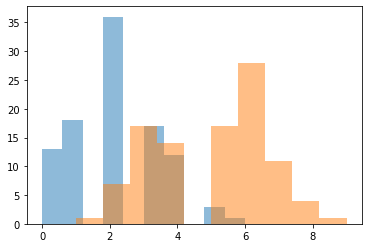

In [18]:
plt.hist(sample1, alpha=0.5, label='Sample 1') # I forgot what Alpha was for?
plt.hist(sample2, alpha=0.5, label='Sample 2')
plt.show()


In [17]:
# Increase the size of your samples from 100 to 1000, 
# then calculate the means and standard deviations for your new samples and 
# create histograms for each. 

sample3 = np.random.choice(pop1, 1000, replace=True)
sample4 = np.random.choice(pop2, 1000, replace=True)

sample3_mean = sample3.mean()
sample4_mean = sample4.mean()

print('Sample mean 3: {} '.format(sample3_mean))
print('Sample mean 4: {} '.format(sample4_mean))

std3_sample3 = np.std(sample3, ddof=1)
std4_sample4 = np.std(sample4, ddof=1)

print('Standard Deviation 3: {} '.format(std3_sample3))
print('Standard Deviation 4: {} '.format(std4_sample4))



Sample mean 3: 2.035 
Sample mean 4: 5.088 
Standard Deviation 3: 1.277265205979716 
Standard Deviation 4: 1.5971245432986143 


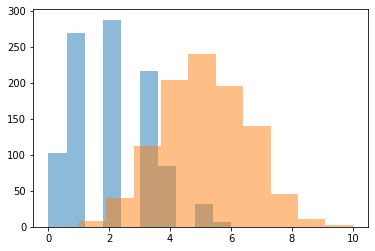

In [19]:
plt.hist(sample3, alpha=0.5, label='Sample 3') # I forgot what Alpha was for?
plt.hist(sample4, alpha=0.5, label='Sample 4')
plt.show()


In [21]:
# Repeat this again, decreasing the size of your samples to 20. 
# What values change, and what remain the same?

sample5 = np.random.choice(pop1, 20, replace=True)
sample6 = np.random.choice(pop2, 20, replace=True)

sample5_mean = sample5.mean()
sample6_mean = sample6.mean()

print('Sample mean 5: {} '.format(sample5_mean))
print('Sample mean 6: {} '.format(sample6_mean))

std5_sample5 = np.std(sample5, ddof=1)
std6_sample6 = np.std(sample6, ddof=1)

print('Standard Deviation 5: {} '.format(std5_sample5))
print('Standard Deviation 6: {} '.format(std6_sample6))

Sample mean 5: 2.15 
Sample mean 6: 5.3 
Standard Deviation 5: 1.2258187382102497 
Standard Deviation 6: 1.4545753585442767 


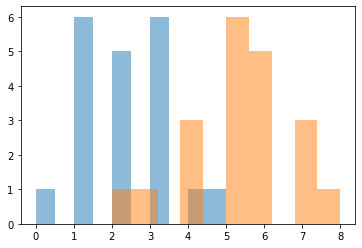

In [22]:
plt.hist(sample5, alpha=0.5, label='Sample 5') # I forgot what Alpha was for?
plt.hist(sample6, alpha=0.5, label='Sample 6')
plt.show()

In [27]:
# Change the probability value (p in the NumPy documentation) for pop1 to 0.3, 
# then take new samples and compute the t-statistic and p-value. 

# Then change the probability value p for group 1 to 0.4, and do it again. 
# What changes, and why?

pop3 = np.random.binomial(10, 0.3, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

sample7 = np.random.choice(pop3, 100, replace=True)
sample8 = np.random.choice(pop2, 100, replace=True)

sample7_mean = sample7.mean()
sample8_mean = sample8.mean()

print('Sample mean 7: {} '.format(sample7_mean))
print('Sample mean 8: {} '.format(sample8_mean))

std7_sample7 = np.std(sample7, ddof=1)
std8_sample8 = np.std(sample8, ddof=1)

print('Standard Deviation 7: {} '.format(std7_sample7))
print('Standard Deviation 8: {} '.format(std8_sample8))

# diff in mean
diff= sample8_mean - sample7_mean
print(diff)

# std error
size = np.array([len(sample7), len(sample8)])
sd = np.array([std7_sample7, std8_sample8])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)

Sample mean 7: 2.86 
Sample mean 8: 4.83 
Standard Deviation 7: 1.3485495387956123 
Standard Deviation 8: 1.504572156374487 
1.97
9.75017772181


Sample mean 7: 2.79 
Sample mean 8: 4.95 
Standard Deviation 7: 1.3203534880225571 
Standard Deviation 8: 1.4310764472870756 


In [ ]:
# Change the distribution of your populations from binomial to a distribution of your choice. 
# Do the sample mean values still accurately represent the population values?